## LIBRARIES

Importing Libraries for data handling, visualising, ML and text analysis

In [11]:
import pandas as pd # Data manipulation and analysis
import numpy as np # Numerical operations
import matplotlib.pyplot as plt # Static visualizations
import seaborn as sns # Enhanced static visualizations
import plotly.express as px # Interactive visualizations
from datetime import datetime

# Machine learning and text processing:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.pipeline import Pipeline

# For generating a word cloud visualization:
from wordcloud import WordCloud

# For additional text analysis:
from collections import Counter
import re

# Enable inline plotting (for Jupyter Notebook users)
%matplotlib inline

## LOADING & INSPECTING DATA


In [12]:
# Load the CSV file into a DataFrame. Adjust the path as needed.
df = pd.read_csv('/Users/manusokane/Desktop/University/UU Computer Science/COM771 - Cyber Security/RT_IOT2022.csv', encoding='utf-8')

# Strip extra whitespace from column names in case there are any hidden spaces.
df.columns = df.columns.str.strip()

# Display the first few rows to understand the data structure.
df.head()

# Print dataset info: list of columns, number of non-null values, and data types.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123117 entries, 0 to 123116
Data columns (total 85 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Unnamed: 0                123117 non-null  int64  
 1   id.orig_p                 123117 non-null  int64  
 2   id.resp_p                 123117 non-null  int64  
 3   proto                     123117 non-null  object 
 4   service                   123117 non-null  object 
 5   flow_duration             123117 non-null  float64
 6   fwd_pkts_tot              123117 non-null  int64  
 7   bwd_pkts_tot              123117 non-null  int64  
 8   fwd_data_pkts_tot         123117 non-null  int64  
 9   bwd_data_pkts_tot         123117 non-null  int64  
 10  fwd_pkts_per_sec          123117 non-null  float64
 11  bwd_pkts_per_sec          123117 non-null  float64
 12  flow_pkts_per_sec         123117 non-null  float64
 13  down_up_ratio             123117 non-null  f

## DATA CLEANING & PREPROCESSING

No NaN or NA values in this dataset

critical fields??

In [ ]:
# Createing new DataFrame
df_cleaned = df.copy()

#Check for missing values in the dataset.
missing = df_cleaned.isnull().sum()
print(f"There are {missing.sum()} missing values in the dataset.")

# Dropping unneccessary columns.
df_cleaned.drop(columns=['Unnamed: 0', 'id.orig_p', 'id.resp_p'], inplace=True) 


df_cleaned.info()

There are 0 missing values in the dataset.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123117 entries, 0 to 123116
Data columns (total 82 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   proto                     123117 non-null  object 
 1   service                   123117 non-null  object 
 2   flow_duration             123117 non-null  float64
 3   fwd_pkts_tot              123117 non-null  int64  
 4   bwd_pkts_tot              123117 non-null  int64  
 5   fwd_data_pkts_tot         123117 non-null  int64  
 6   bwd_data_pkts_tot         123117 non-null  int64  
 7   fwd_pkts_per_sec          123117 non-null  float64
 8   bwd_pkts_per_sec          123117 non-null  float64
 9   flow_pkts_per_sec         123117 non-null  float64
 10  down_up_ratio             123117 non-null  float64
 11  fwd_header_size_tot       123117 non-null  int64  
 12  fwd_header_size_min       123117 non-null  int64  
 13  f

## EXPLORATORY DATA ANALYSIS

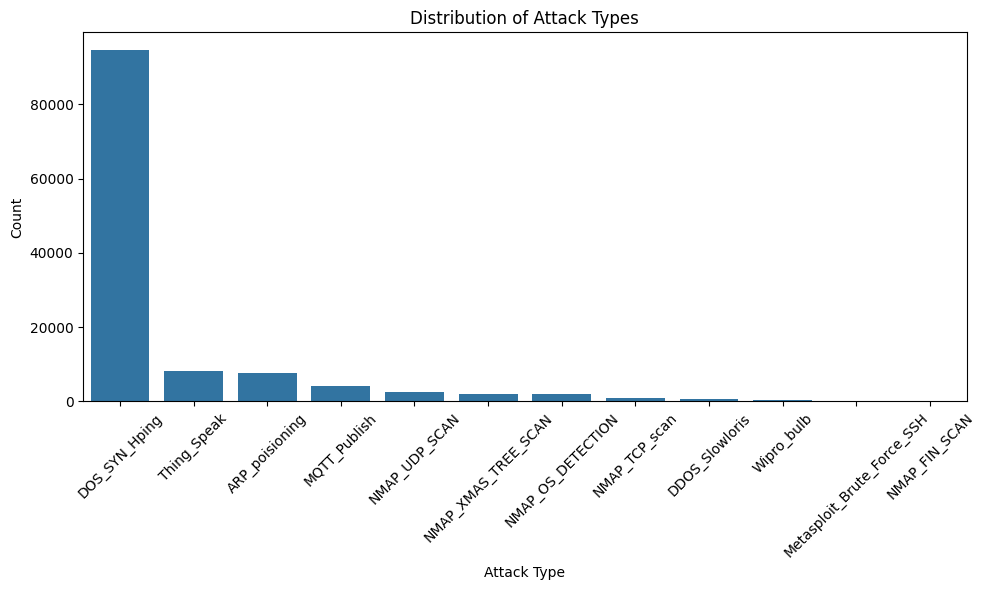

In [14]:
# Distrubtion of the attack types
plt.figure(figsize=(10, 6))
sns.countplot(data=df_cleaned, x='Attack_type', order=df_cleaned['Attack_type'].value_counts().index)
plt.xlabel("Attack Type")
plt.ylabel("Count")
plt.title("Distribution of Attack Types")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Bias towards DOS_SYN_Hping
Could skew model performance

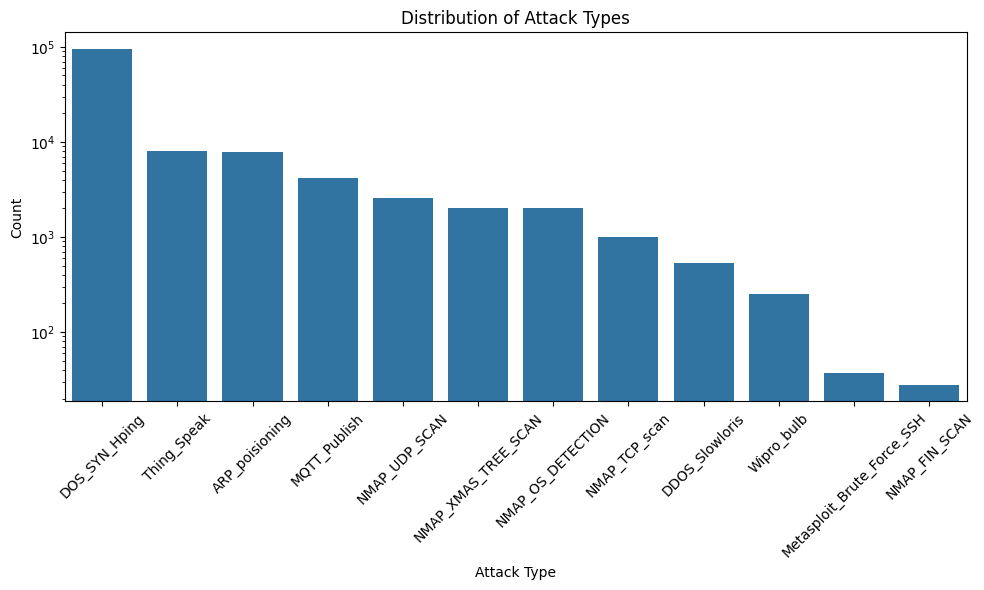

In [15]:
# Distrubtion of the attack types
plt.figure(figsize=(10, 6))
sns.countplot(data=df_cleaned, x='Attack_type', order=df_cleaned['Attack_type'].value_counts().index)
plt.xlabel("Attack Type")
plt.ylabel("Count")
plt.title("Distribution of Attack Types")
plt.xticks(rotation=45)
plt.yscale('log')
plt.tight_layout()
plt.show()

log scaling to represent all classes. results aren't distorted.

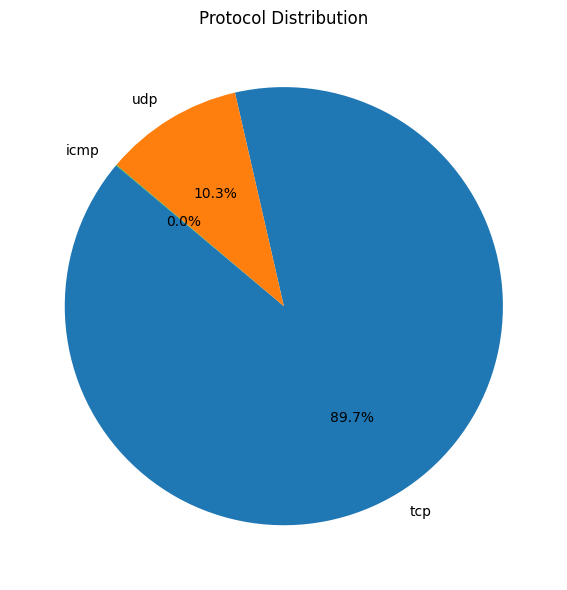

In [44]:
# Protocol distribution as a pie chart
protocol_counts = df_cleaned['proto'].value_counts()
protocol_labels = protocol_counts.index

plt.figure(figsize=(10, 6))
plt.pie(protocol_counts, labels=protocol_labels, autopct='%1.1f%%', startangle=140)
plt.title("Protocol Distribution")
plt.tight_layout()
plt.show()

Label encoding for categorical columns

In [29]:
from sklearn.preprocessing import LabelEncoder

# Create a copy of the cleaned DataFrame to avoid overwriting
df_encoded = df_cleaned.copy()

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Identify categorical columns
categorical_columns = df_encoded.select_dtypes(include=['object']).columns

# Apply label encoding to each categorical column
for col in categorical_columns:
    df_encoded[col] = label_encoder.fit_transform(df_encoded[col])
    print(f"Column '{col}' has been label encoded.")

# Display the first few rows of the encoded DataFrame
df_encoded.head()

Column 'proto' has been label encoded.
Column 'service' has been label encoded.
Column 'Attack_type' has been label encoded.


,proto,service,flow_duration,fwd_pkts_tot,bwd_pkts_tot,fwd_data_pkts_tot,bwd_data_pkts_tot,fwd_pkts_per_sec,bwd_pkts_per_sec,flow_pkts_per_sec,...,active.std,idle.min,idle.max,idle.tot,idle.avg,idle.std,fwd_init_window_size,bwd_init_window_size,fwd_last_window_size,Attack_type
0,1,5,32.011598,9,5,3,3,0.281148,0.156193,0.437341,...,0.0,2.972918e+07,2.972918e+07,2.972918e+07,2.972918e+07,0.0,64240,26847,502,3
1,1,5,31.883584,9,5,3,3,0.282277,0.156821,0.439097,...,0.0,2.985528e+07,2.985528e+07,2.985528e+07,2.985528e+07,0.0,64240,26847,502,3
2,1,5,32.124053,9,5,3,3,0.280164,0.155647,0.435811,...,0.0,2.984215e+07,2.984215e+07,2.984215e+07,2.984215e+07,0.0,64240,26847,502,3
3,1,5,31.961063,9,5,3,3,0.281593,0.156440,0.438033,...,0.0,2.991377e+07,2.991377e+07,2.991377e+07,2.991377e+07,0.0,64240,26847,502,3
4,1,5,31.902362,9,5,3,3,0.282111,0.156728,0.438839,...,0.0,2.981470e+07,2.981470e+07,2.981470e+07,2.981470e+07,0.0,64240,26847,502,3


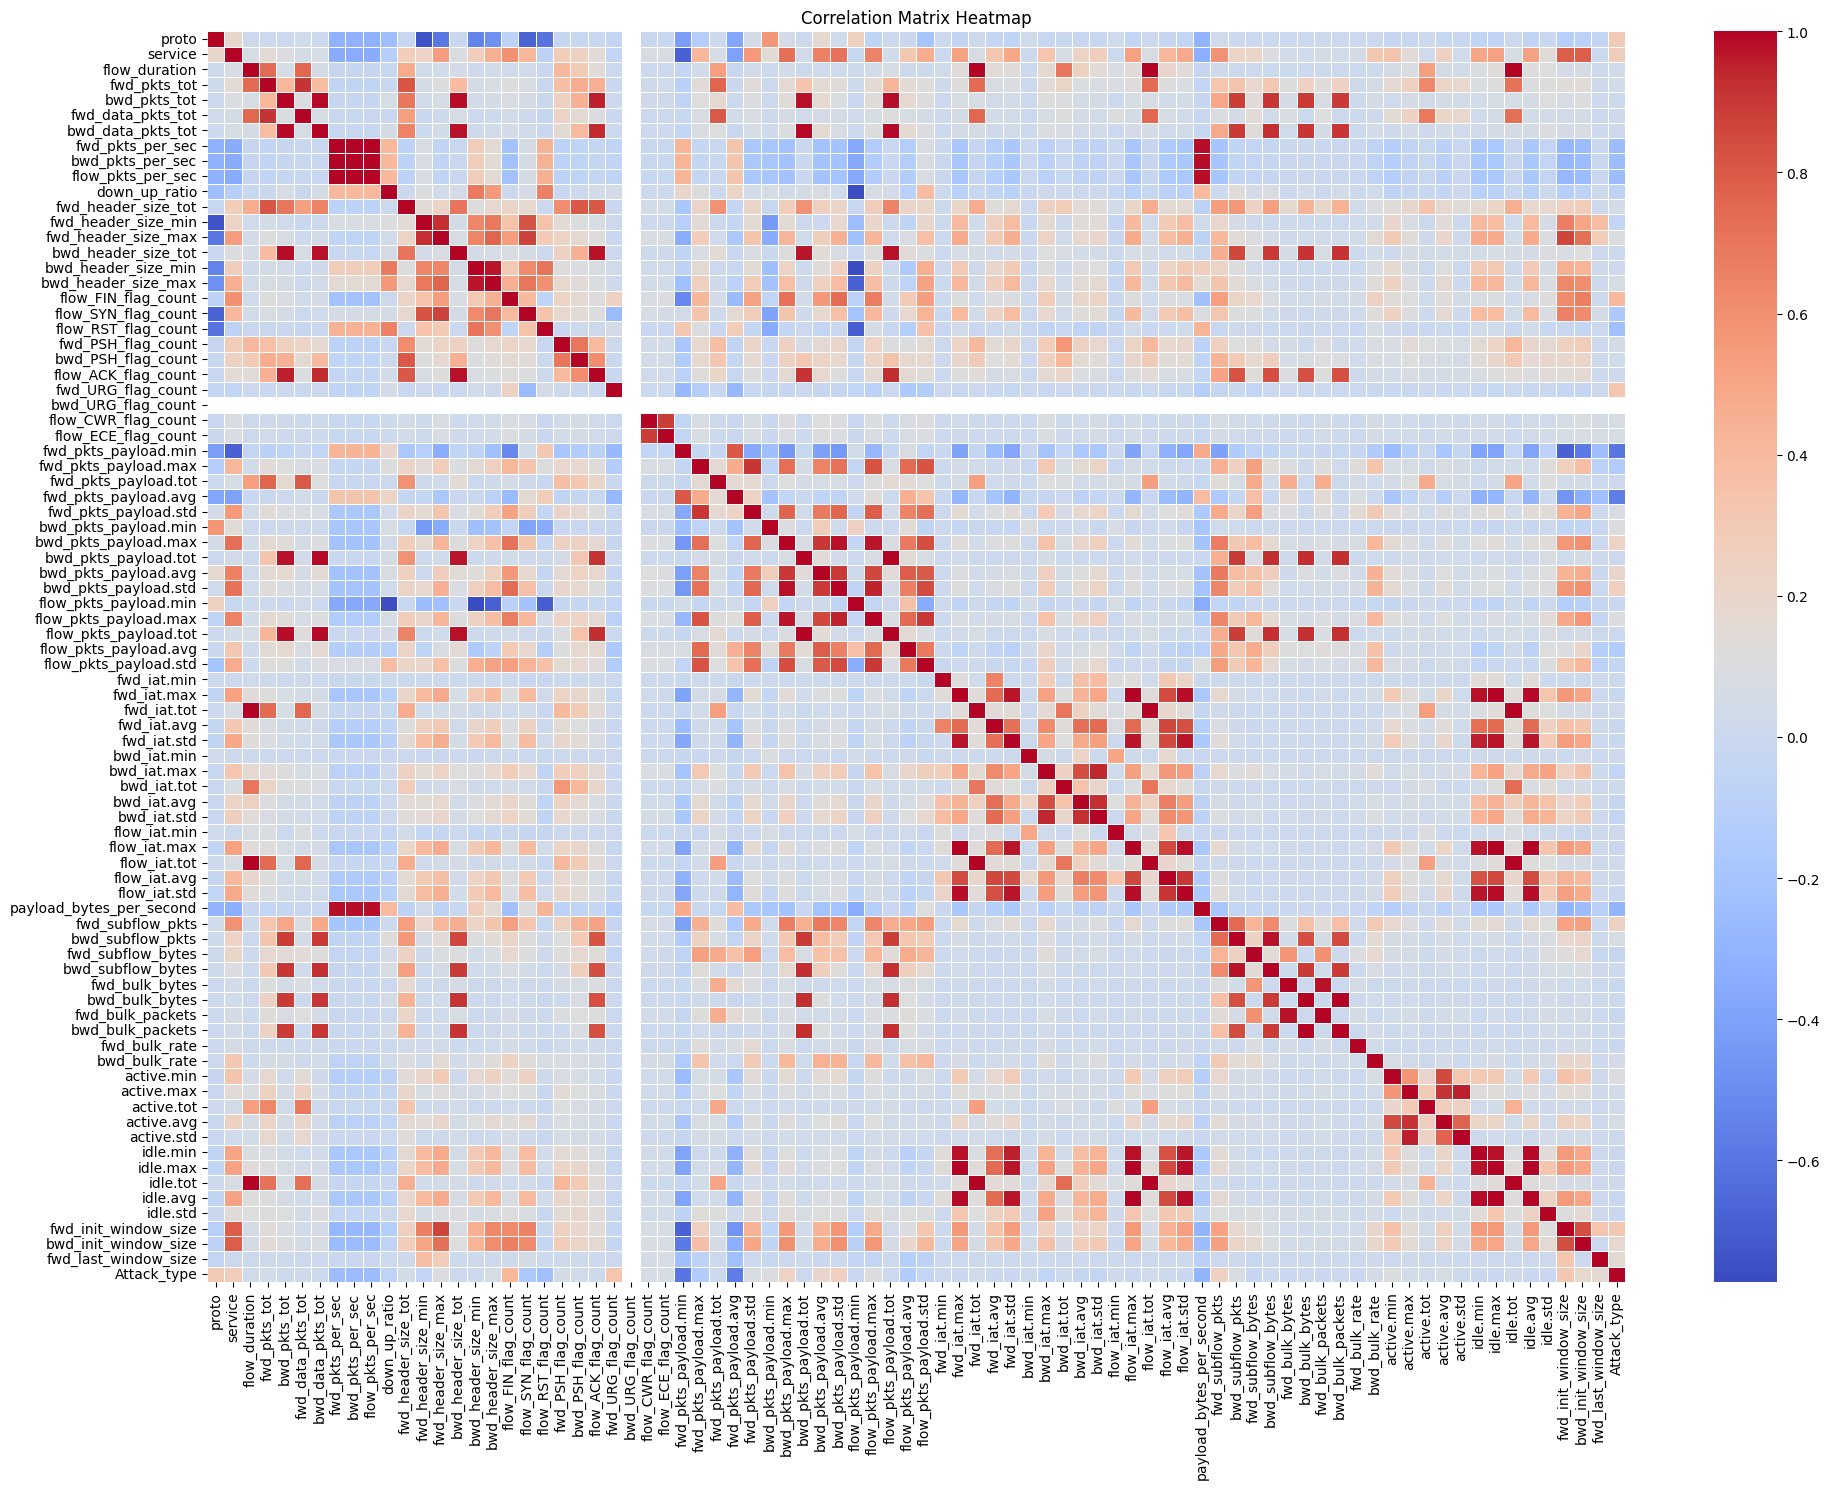

In [17]:
# Generate the correlation matrix
correlation_matrix = df_encoded.corr()

# Plot the heatmap
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.tight_layout()
plt.show()

In [34]:
print(df_encoded.head())

# Sample a subset for faster processing (e.g., 1000 rows)
df_ml_sample = df_encoded.sample(n=min(1000, len(df_encoded)), random_state=42)
print("\nShape of the ML sample dataset:", df_ml_sample.shape)



   proto  service  flow_duration  fwd_pkts_tot  bwd_pkts_tot  \
0      1        5      32.011598             9             5   
1      1        5      31.883584             9             5   
2      1        5      32.124053             9             5   
3      1        5      31.961063             9             5   
4      1        5      31.902362             9             5   

   fwd_data_pkts_tot  bwd_data_pkts_tot  fwd_pkts_per_sec  bwd_pkts_per_sec  \
0                  3                  3          0.281148          0.156193   
1                  3                  3          0.282277          0.156821   
2                  3                  3          0.280164          0.155647   
3                  3                  3          0.281593          0.156440   
4                  3                  3          0.282111          0.156728   

   flow_pkts_per_sec  ...  active.std      idle.min      idle.max  \
0           0.437341  ...         0.0  2.972918e+07  2.972918e+07   
1 

## TRAINING



In [40]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB
import seaborn as sns
import matplotlib.pyplot as plt

X = df_ml_sample.drop(['Attack_type'], axis=1)
y = df_ml_sample['Attack_type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Function to evaluate a model
def evaluate_model(model, model_name):
    # Fit the model
    model.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = model.predict(X_test)

    # Print model performance report with zero_division set to 0 to handle undefined precision.
    print(f"\n--- {model_name} ---")
    print(classification_report(y_test, y_pred, zero_division=0))

    # Generate and display the confusion matrix
    #cm = confusion_matrix(y_test, y_pred)
    #plt.figure(figsize=(6, 5))
    #sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=model.classes_, yticklabels=model.classes_)
    #plt.xlabel("Predicted")
    #plt.ylabel("True")
    #plt.title(f"Confusion Matrix - {model_name}")
    #plt.tight_layout()
    #plt.show()

# Evaluate different models.
evaluate_model(LogisticRegression(max_iter=1000, random_state=42),"Logistic Regression")
evaluate_model(SVC(probability=True, random_state=42), "Support Vector Machine")
evaluate_model(RandomForestClassifier(random_state=42), "Random Forest")
evaluate_model(MultinomialNB(), "Multinomial Naive Bayes")
evaluate_model(HistGradientBoostingClassifier(random_state=42), "Gradient Boosting Classifier")



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



--- Logistic Regression ---
              precision    recall  f1-score   support

           0       0.71      0.31      0.43        16
           1       0.00      0.00      0.00         1
           2       0.89      1.00      0.94       139
           3       0.92      1.00      0.96        11
           6       1.00      0.33      0.50         3
           7       1.00      1.00      1.00         3
           8       0.00      0.00      0.00         8
           9       0.50      0.67      0.57         3
          10       0.94      0.94      0.94        16
          11       0.00      0.00      0.00         0

    accuracy                           0.88       200
   macro avg       0.60      0.53      0.53       200
weighted avg       0.84      0.88      0.85       200


--- Support Vector Machine ---
              precision    recall  f1-score   support

           0       0.50      0.06      0.11        16
           1       0.00      0.00      0.00         1
           2     

In [36]:
# Display the mapping of original labels to encoded labels
label_mapping = {index: label for index, label in enumerate(label_encoder.classes_)}
print("Label Mapping:", label_mapping)


Label Mapping: {0: 'ARP_poisioning', 1: 'DDOS_Slowloris', 2: 'DOS_SYN_Hping', 3: 'MQTT_Publish', 4: 'Metasploit_Brute_Force_SSH', 5: 'NMAP_FIN_SCAN', 6: 'NMAP_OS_DETECTION', 7: 'NMAP_TCP_scan', 8: 'NMAP_UDP_SCAN', 9: 'NMAP_XMAS_TREE_SCAN', 10: 'Thing_Speak', 11: 'Wipro_bulb'}
